https://wikidocs.net/21693
https://somjang.tistory.com/entry/Kaggle-DAY10Real-or-Not-NLP-with-Disaster-Tweets?category=375581

In [652]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from tqdm import tqdm
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download("stopwords")
nltk.download("punkt")


with tf.device("/gpu:0"):
    np.random.seed(3)
    tf.random.set_seed(3)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acsl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acsl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [653]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")


train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [654]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [655]:
train_x = train.drop("target", axis=1, inplace=False)
train_y = train["target"]
test_x = test

In [656]:
train_x.head(3)


,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...


C:\Users\acsl\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'samples')

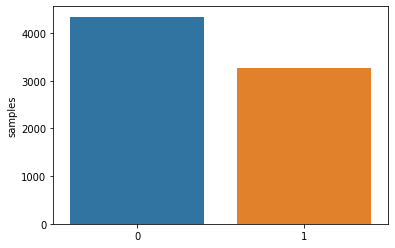

In [657]:
x = train_y.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel("samples")

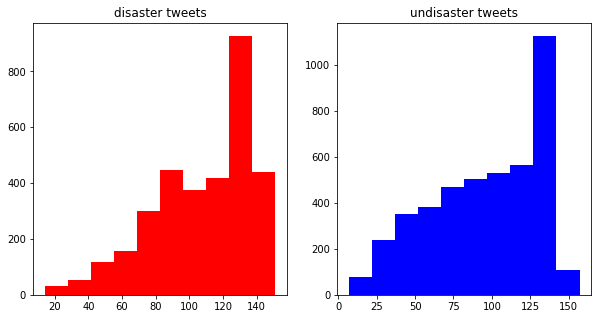

In [658]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
text_len = train[train['target'] == 1]['text'].str.len()
ax1.hist(text_len, color='red')
ax1.set_title('disaster tweets')

text_len = train[train['target'] == 0]['text'].str.len()
ax2.hist(text_len, color='blue')
ax2.set_title('undisaster tweets')

plt.show()

text length

Text(0.5, 1.0, 'undisaster tweets')

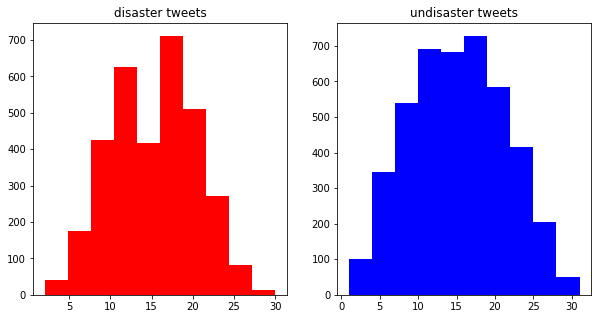

In [659]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
text_len = train[train['target'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('disaster tweets')

text_len = train[train['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('undisaster tweets')

num of word

In [660]:
text_list=list(train_x['text'])
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+/(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

clear_text_list = []

for i in tqdm(range(len(text_list))):
    clear_text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text_list[i])
    clear_text_list.append(clear_text.lower())
    
train_x['clear_text'] = clear_text_list
train_x.head(2)


100%|██████████| 7613/7613 [00:00<00:00, 475386.51it/s]


,id,keyword,location,text,clear_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada


In [661]:
text_list=list(test_x['text'])
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+/(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

clear_text_list = []

for i in tqdm(range(len(text_list))):
    clear_text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text_list[i])
    clear_text_list.append(clear_text.lower())
    
test_x['clear_text'] = clear_text_list

100%|██████████| 3263/3263 [00:00<00:00, 465732.46it/s]


In [662]:
train_x.head(10)

,id,keyword,location,text,clear_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,rockyfire update california hwy 20 closed in ...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,flood disaster heavy rain causes flash floodin...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,im on top of the hill and i can see a fire in ...
8,14,NaN,NaN,There's an emergency evacuation happening now ...,theres an emergency evacuation happening now i...
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,im afraid that the tornado is coming to our area


In [663]:
import re
stop_words = set(stopwords.words('english'))

text_list=list(train_x['clear_text'])

clear_text_list = []

for i in tqdm(range(len(text_list))):
    words_tokens = word_tokenize(text_list[i])
    words_tokens =[word for word in words_tokens if word not in stop_words]
    words_tokens =[word for word in words_tokens if len(word) > 2]
    clear_text_list.append(' '.join(words_tokens))
    
train_x['clear_text'] = clear_text_list
train_x.head(2)
    

100%|██████████| 7613/7613 [00:00<00:00, 15970.68it/s]


,id,keyword,location,text,clear_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,deeds reason earthquake may allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,forest fire near ronge sask canada


In [664]:
text_list=list(test_x['clear_text'])

clear_text_list = []

for i in tqdm(range(len(text_list))):
    words_tokens = word_tokenize(text_list[i])
    words_tokens =[word for word in words_tokens if word not in stop_words]
    words_tokens =[word for word in words_tokens if len(word) > 2]
    clear_text_list.append(' '.join(words_tokens))
    
test_x['clear_text'] = clear_text_list

100%|██████████| 3263/3263 [00:00<00:00, 15825.38it/s]


In [665]:
sentenses = train_x["clear_text"]
train_x = train_x["clear_text"]
test_x = test_x["clear_text"]

In [666]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=True)

In [667]:
vocab_size = 1000
token = Tokenizer(num_words = vocab_size)
token.fit_on_texts(sentenses)

train_sequences = token.texts_to_sequences(train_x)
val_sequences = token.texts_to_sequences(val_x)
test_sequences = token.texts_to_sequences(test_x)

In [668]:
trunc_type = 'post'
padding_type = 'post'

max_length = 50
train_pad = pad_sequences(train_sequences, truncating=trunc_type, padding=padding_type, maxlen=max_length)
val_pad = pad_sequences(val_sequences, truncating=trunc_type, padding=padding_type, maxlen=max_length)
test_pad = pad_sequences(test_sequences, truncating=trunc_type, padding=padding_type, maxlen=max_length)


In [669]:
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Embedding

with tf.device("/gpu:0"):
    np.random.seed(3)
    tf.random.set_seed(3)
    
embedding_dim = 64
model = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.5), 
    Dense(1, activation='sigmoid')
])

In [670]:
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, None, 64)          64000     
                                                                 
 bidirectional_43 (Bidirecti  (None, None, 128)        66048     
 onal)                                                           
                                                                 
 bidirectional_44 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_53 (Dense)            (None, 1)               

In [671]:
epochs = 2
history = model.fit(
    train_pad,
    train_y,
    validation_data=(val_pad, val_y),
    batch_size = 32,
    epochs=epochs,
    verbose=1
    )

Epoch 1/4
215/215 [==============================] - 9s 31ms/step - loss: 0.5608 - accuracy: 0.7052 - val_loss: 0.4528 - val_accuracy: 0.7913
Epoch 2/4
215/215 [==============================] - 6s 26ms/step - loss: 0.4244 - accuracy: 0.8124 - val_loss: 0.4622 - val_accuracy: 0.7808
Epoch 3/4
215/215 [==============================] - 5s 25ms/step - loss: 0.4021 - accuracy: 0.8276 - val_loss: 0.4613 - val_accuracy: 0.8031
Epoch 4/4
215/215 [==============================] - 5s 23ms/step - loss: 0.3876 - accuracy: 0.8383 - val_loss: 0.4910 - val_accuracy: 0.7690


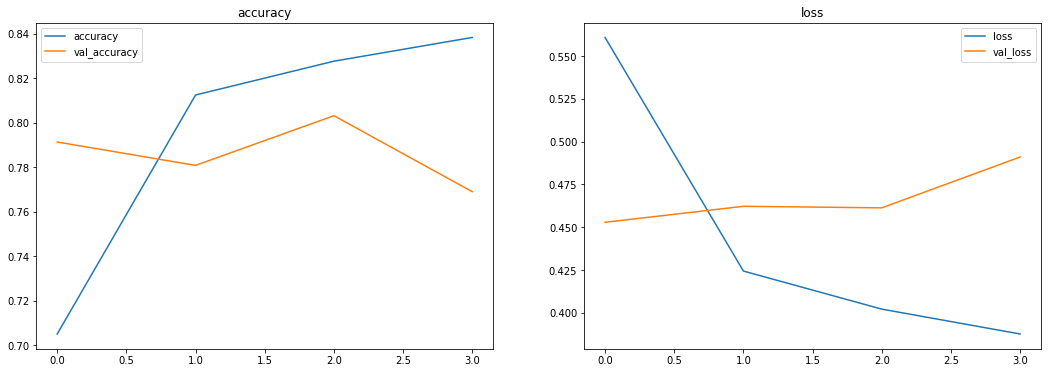

In [672]:
plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()

In [673]:
result = model.predict(test_pad).reshape(test_x.shape)
result = np.where(result > 0.5, 1, 0)
result

array([1, 1, 1, ..., 1, 1, 0])

In [674]:
submission = pd.read_csv("data/sample_submission.csv")
submission["target"] = result
submission.to_csv('submission.csv', index=False)